In [322]:
from IPython.display import HTML
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }
  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

# Initial investigation

## Import modules, read data


In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 999
sns.set_style('darkgrid')

df = pd.read_csv('traffic.zip', parse_dates={'timestamp':[0,1]}) #look up time zones (UTC)

## View data and data summaries

In [324]:
df.head(10)

,timestamp,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2020-08-29 15:40:00,BRONX,10466.0,40.892100,-73.833760,POINT (-73.83376 40.8921),PRATT AVENUE,STRANG AVENUE,NaN,0,0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,4342908,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2020-08-29 21:00:00,BROOKLYN,11221.0,40.690500,-73.919914,POINT (-73.919914 40.6905),BUSHWICK AVENUE,PALMETTO STREET,NaN,2,0,0,0,0,0,2,0,Reaction to Uninvolved Vehicle,Unspecified,NaN,NaN,NaN,4343555,Sedan,Sedan,NaN,NaN,NaN
2,2020-08-29 18:20:00,NaN,NaN,40.816500,-73.946556,POINT (-73.946556 40.8165),8 AVENUE,NaN,NaN,1,0,1,0,0,0,0,0,Backing Unsafely,NaN,NaN,NaN,NaN,4343142,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,2020-08-29 00:00:00,BRONX,10459.0,40.824720,-73.892960,POINT (-73.89296 40.82472),NaN,NaN,1047 SIMPSON STREET,0,0,0,0,0,0,0,0,Unsafe Speed,Unspecified,Unspecified,Unspecified,NaN,4343588,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,NaN
4,2020-08-29 17:10:00,BROOKLYN,11203.0,40.649890,-73.933890,POINT (-73.93389 40.64989),NaN,NaN,4609 SNYDER AVENUE,0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,4342953,Sedan,Sedan,NaN,NaN,NaN
5,2020-08-29 03:29:00,NaN,NaN,40.682310,-73.844950,POINT (-73.84495 40.68231),WOODHAVEN BOULEVARD,NaN,NaN,1,0,0,0,0,0,1,0,Unspecified,Unspecified,NaN,NaN,NaN,4342721,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
6,2020-08-29 19:30:00,BRONX,10459.0,40.825226,-73.887780,POINT (-73.88778 40.825226),LONGFELLOW AVENUE,EAST 165 STREET,NaN,0,0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4343004,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
7,2020-08-29 00:00:00,NaN,NaN,40.800160,-73.935380,POINT (-73.93538 40.80016),2 AVENUE,NaN,NaN,0,0,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,NaN,NaN,NaN,4343342,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
8,2020-08-29 19:50:00,BRONX,10466.0,40.894314,-73.860270,POINT (-73.86027 40.894314),EAST 233 STREET,CARPENTER AVENUE,NaN,0,0,0,0,0,0,0,0,Unsafe Speed,Unspecified,Unspecified,NaN,NaN,4343030,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN
9,2020-08-29 09:20:00,QUEENS,11385.0,40.706780,-73.908880,POINT (-73.90888 40.70678),NaN,NaN,565 WOODWARD AVENUE,0,0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4343040,Sedan,NaN,NaN,NaN,NaN


In [325]:
df.describe()

,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,49134.000000,68935.000000,68935.000000,74881.000000,74881.000000,74881.000000,74881.000000,74881.000000,74881.000000,74881.000000,74881.000000,7.488100e+04
mean,10913.681585,40.689825,-73.843376,0.366555,0.001923,0.054740,0.000748,0.043709,0.000120,0.268105,0.001055,4.305762e+06
std,515.069483,1.233368,2.234881,0.726178,0.047609,0.237582,0.027337,0.209737,0.010963,0.691423,0.037073,2.171658e+04
min,10000.000000,0.000000,-74.253006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.063247e+06
25%,10458.000000,40.667076,-73.958680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.287041e+06
50%,11210.000000,40.716885,-73.916850,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.305812e+06
75%,11354.000000,40.789445,-73.862630,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.324545e+06
max,11697.000000,40.912884,0.000000,15.000000,4.000000,6.000000,1.000000,3.000000,1.000000,15.000000,4.000000,4.343622e+06


In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74881 entries, 0 to 74880
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   timestamp                      74881 non-null  datetime64[ns]
 1   BOROUGH                        49140 non-null  object        
 2   ZIP CODE                       49134 non-null  float64       
 3   LATITUDE                       68935 non-null  float64       
 4   LONGITUDE                      68935 non-null  float64       
 5   LOCATION                       68935 non-null  object        
 6   ON STREET NAME                 55444 non-null  object        
 7   CROSS STREET NAME              35681 non-null  object        
 8   OFF STREET NAME                19437 non-null  object        
 9   NUMBER OF PERSONS INJURED      74881 non-null  int64         
 10  NUMBER OF PERSONS KILLED       74881 non-null  int64         
 11  NUMBER OF PEDES

## Clean data

### remove all-caps in column names and some fields

All of the column names, borough names, and street names in all caps makes this dataframe difficult to work with. Let's quickly changing them all to lower case and if we will re-capitalize borough or street names later in graphs or legends as needed.

In [327]:
df.columns = map(str.lower, df.columns)

for col in ['borough', 'on street name', 'cross street name', 'off street name']:
    df[col] = df[col].str.lower()

### change spaces in column names to underscores

In [328]:
df.columns = df.columns.str.replace(' ','_')

### change zip and collision id to categorical data

This is a universally common step for working with zip codes and id numbers. 

In [329]:
df.zip_code = df.zip_code.dropna().apply(lambda x: str(int(x)))
df.collision_id = df.collision_id.dropna().apply(lambda x: str(int(x)))

### check results

In [330]:
df.head()

,timestamp,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2020-08-29 15:40:00,bronx,10466,40.89210,-73.833760,POINT (-73.83376 40.8921),pratt avenue,strang avenue,NaN,0,0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,4342908,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2020-08-29 21:00:00,brooklyn,11221,40.69050,-73.919914,POINT (-73.919914 40.6905),bushwick avenue,palmetto street,NaN,2,0,0,0,0,0,2,0,Reaction to Uninvolved Vehicle,Unspecified,NaN,NaN,NaN,4343555,Sedan,Sedan,NaN,NaN,NaN
2,2020-08-29 18:20:00,NaN,NaN,40.81650,-73.946556,POINT (-73.946556 40.8165),8 avenue,NaN,NaN,1,0,1,0,0,0,0,0,Backing Unsafely,NaN,NaN,NaN,NaN,4343142,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,2020-08-29 00:00:00,bronx,10459,40.82472,-73.892960,POINT (-73.89296 40.82472),NaN,NaN,1047 simpson street,0,0,0,0,0,0,0,0,Unsafe Speed,Unspecified,Unspecified,Unspecified,NaN,4343588,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,NaN
4,2020-08-29 17:10:00,brooklyn,11203,40.64989,-73.933890,POINT (-73.93389 40.64989),NaN,NaN,4609 snyder avenue,0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,4342953,Sedan,Sedan,NaN,NaN,NaN


In [331]:
df.dtypes

timestamp                        datetime64[ns]
borough                                  object
zip_code                                 object
latitude                                float64
longitude                               float64
location                                 object
on_street_name                           object
cross_street_name                        object
off_street_name                          object
number_of_persons_injured                 int64
number_of_persons_killed                  int64
number_of_pedestrians_injured             int64
number_of_pedestrians_killed              int64
number_of_cyclist_injured                 int64
number_of_cyclist_killed                  int64
number_of_motorist_injured                int64
number_of_motorist_killed                 int64
contributing_factor_vehicle_1            object
contributing_factor_vehicle_2            object
contributing_factor_vehicle_3            object
contributing_factor_vehicle_4           

## Check NaN's and possibly drop them

This dataframe has a lot of missing data. Some of it makes sense: `contributing_factor_vehicle_4` and `vehicle_type_code_4` are empty if three or fewer vehicles were involved. 

Then there are many events missing borough and zip code. There are many fewer missing latitudes/longitudes. If we wanted, we could spend the time finding a source that links lat/long to borough/zip and fill in this missing data, but that isn't necessary for this rough overview. We will just drop the data missing borough and zip.

The length of the dataframe and number of missing data before dropping:

In [332]:
len(df)

74881

In [333]:
df.isna().sum()

timestamp                            0
borough                          25741
zip_code                         25747
latitude                          5946
longitude                         5946
location                          5946
on_street_name                   19437
cross_street_name                39200
off_street_name                  55444
number_of_persons_injured            0
number_of_persons_killed             0
number_of_pedestrians_injured        0
number_of_pedestrians_killed         0
number_of_cyclist_injured            0
number_of_cyclist_killed             0
number_of_motorist_injured           0
number_of_motorist_killed            0
contributing_factor_vehicle_1      304
contributing_factor_vehicle_2    15596
contributing_factor_vehicle_3    68116
contributing_factor_vehicle_4    73030
contributing_factor_vehicle_5    74358
collision_id                         0
vehicle_type_code_1                635
vehicle_type_code_2              21243
vehicle_type_code_3      

In [334]:
df = df.dropna(subset=['borough', 'zip_code'])

and after dropping:

In [335]:
len(df)

49134

In [336]:
df.isna().sum()

timestamp                            0
borough                              0
zip_code                             0
latitude                          1394
longitude                         1394
location                          1394
on_street_name                   18834
cross_street_name                18848
off_street_name                  30300
number_of_persons_injured            0
number_of_persons_killed             0
number_of_pedestrians_injured        0
number_of_pedestrians_killed         0
number_of_cyclist_injured            0
number_of_cyclist_killed             0
number_of_motorist_injured           0
number_of_motorist_killed            0
contributing_factor_vehicle_1      234
contributing_factor_vehicle_2    10939
contributing_factor_vehicle_3    45193
contributing_factor_vehicle_4    48008
contributing_factor_vehicle_5    48800
collision_id                         0
vehicle_type_code_1                488
vehicle_type_code_2              15064
vehicle_type_code_3      

## Pair-wise scatterplots and correlation heatmap

These two graphics will give us a sense of how the numerical data is interrelated.

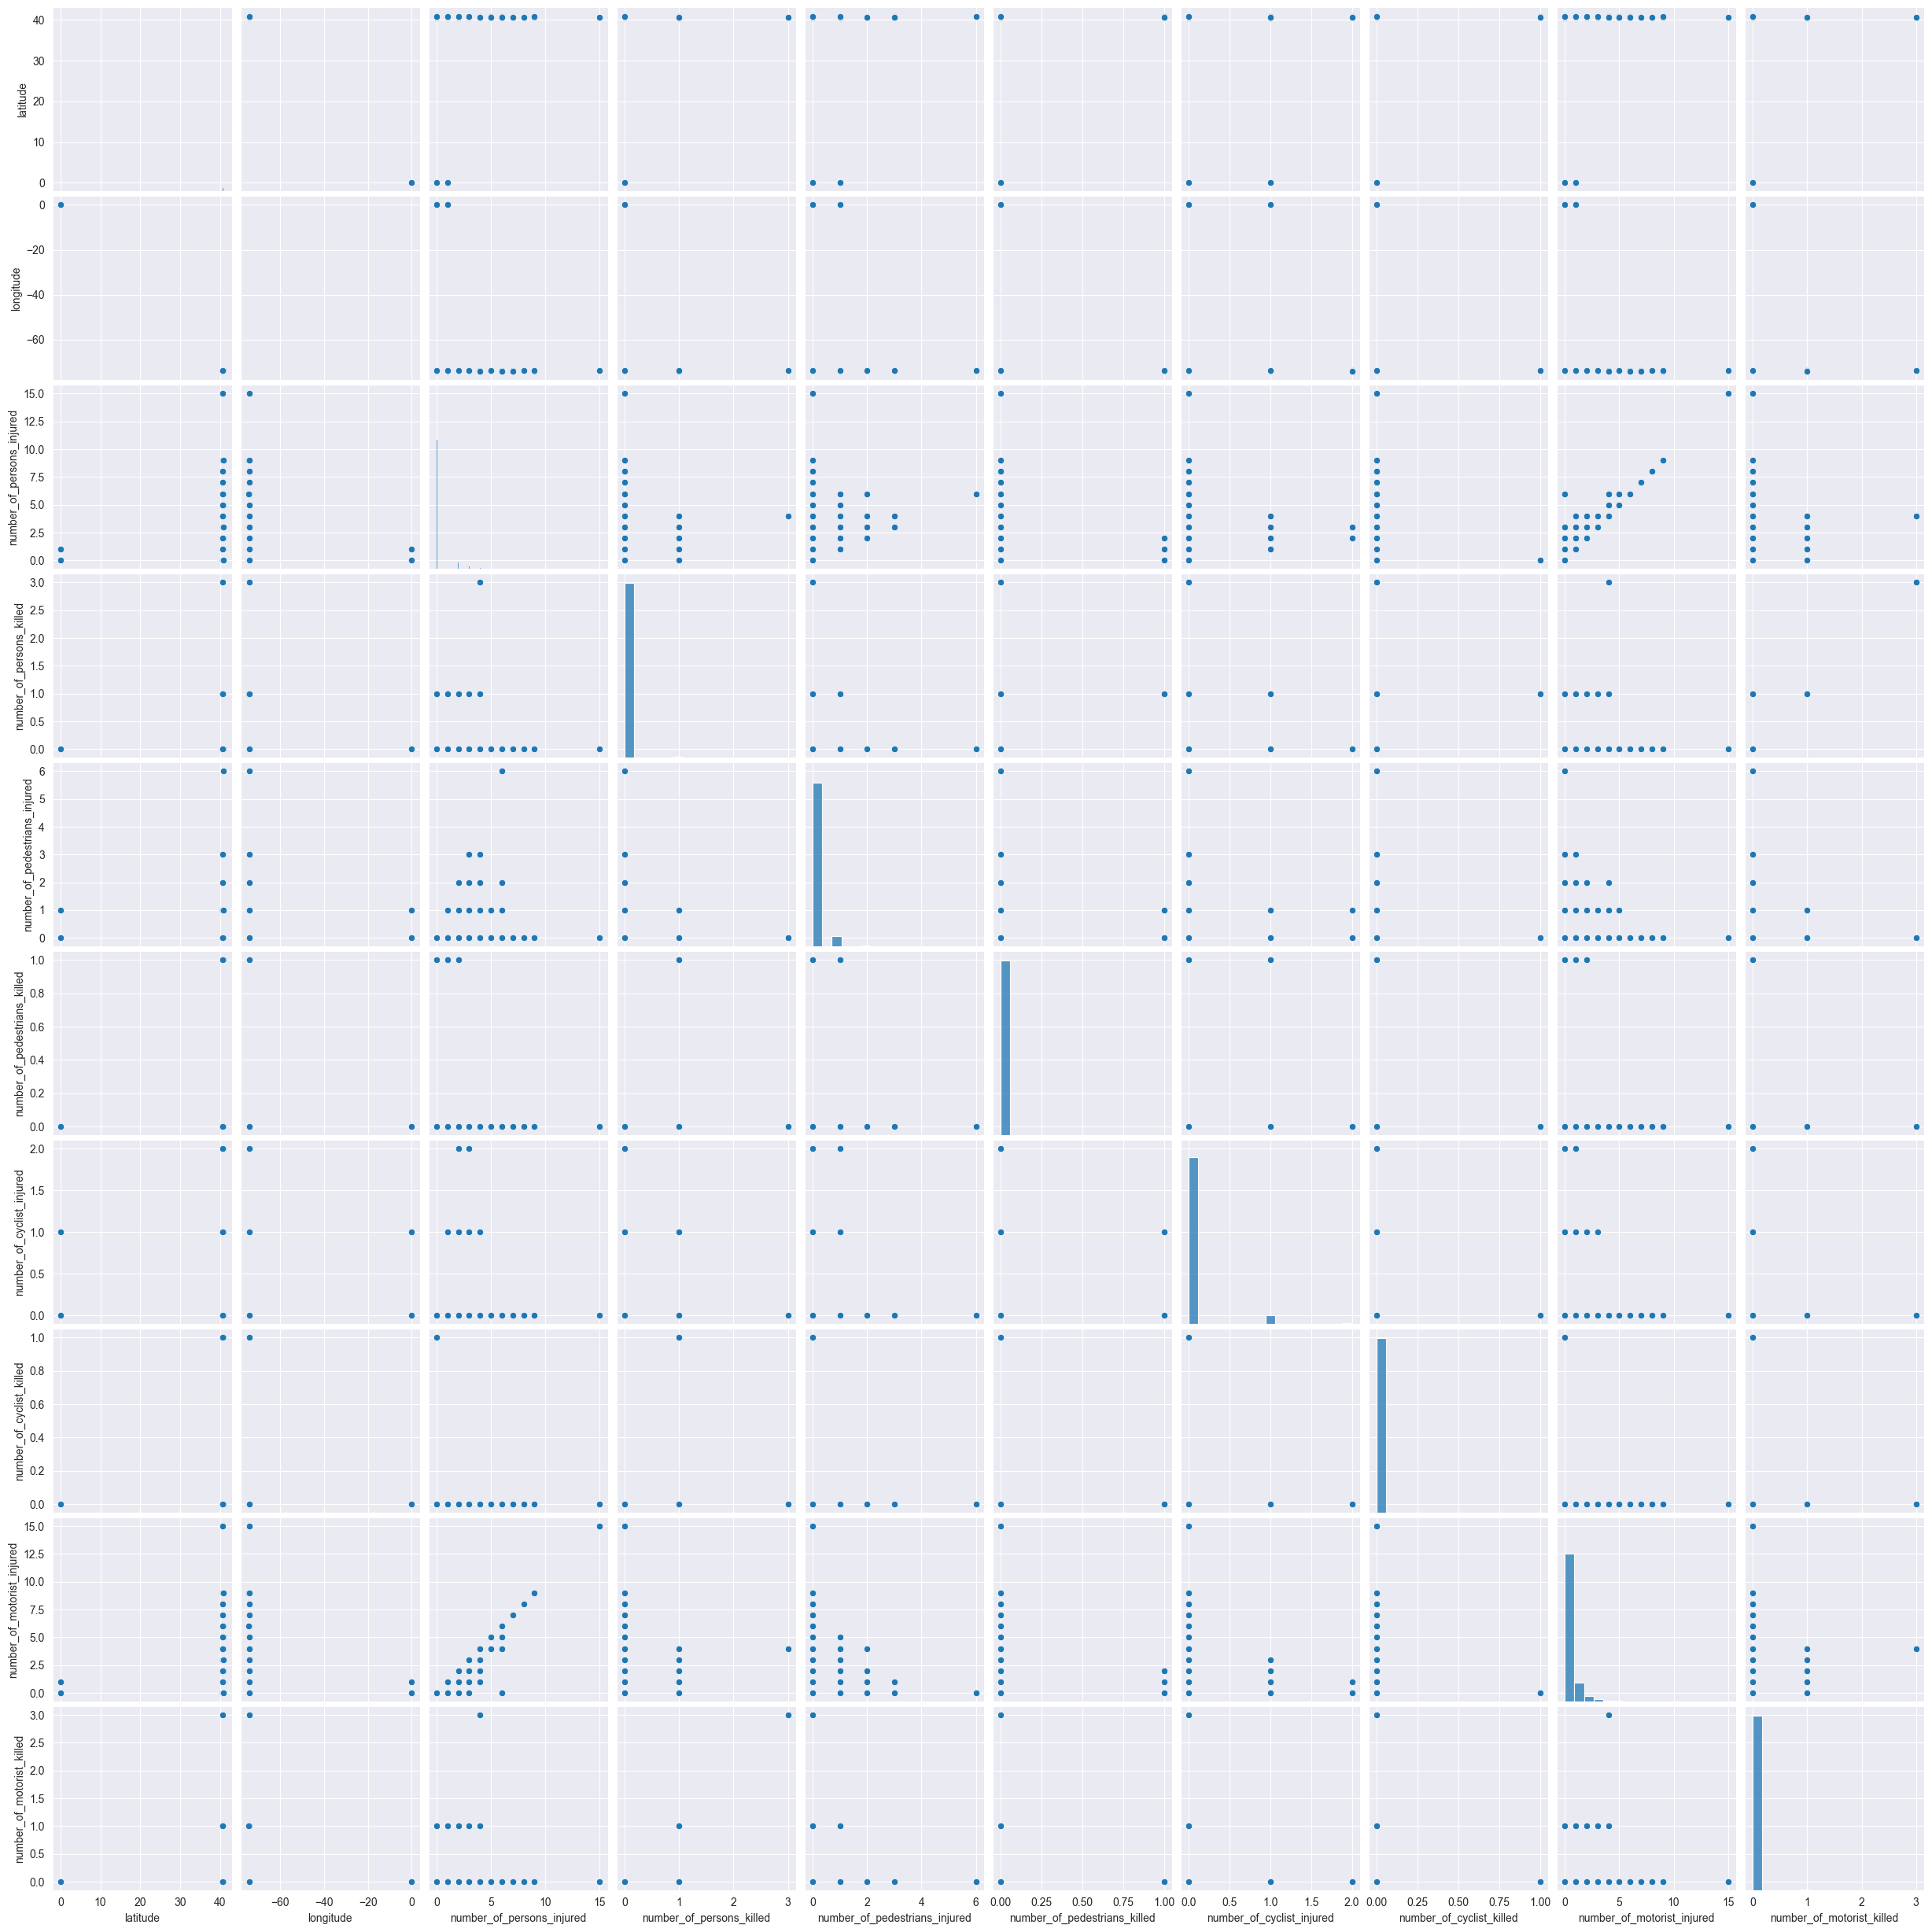

In [337]:
sns.pairplot(df)

<AxesSubplot: >

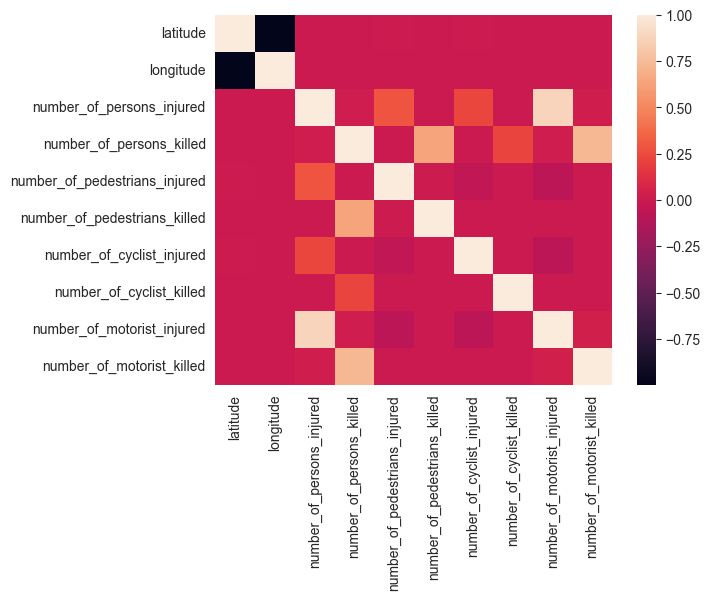

In [338]:
sns.heatmap(df.corr(numeric_only=True))

The results here don't show us any very interesting relationships among the numerical data. Essentially all we can see here, from some of the more linear scatterplots and from the non-zero correlations

## Drop some columns

For this overview, we will keep only the most relevant columns. We will keep `timestamp`, `borough`, `latitude` and `longitude`. Of the street name data, we will only keep `on_street_name`. While a deeper investigation into separating motorists, cyclists, and pedestrians injured/killed, for now we will drop these subcategories and keep only the total persons injured/killed. We will drop all of the contributing factors but vehicle 1, and will drop collision id (presumably just for filing purposes by the city) and will drop the vehicle types.

In [339]:
df = df[['timestamp', 'borough', 'zip_code', 'latitude', 'longitude', 'on_street_name', 'number_of_persons_injured', 'number_of_persons_killed', 'contributing_factor_vehicle_1']]
df.head()

,timestamp,borough,zip_code,latitude,longitude,on_street_name,number_of_persons_injured,number_of_persons_killed,contributing_factor_vehicle_1
0,2020-08-29 15:40:00,bronx,10466,40.892100,-73.833760,pratt avenue,0,0,Passing Too Closely
1,2020-08-29 21:00:00,brooklyn,11221,40.690500,-73.919914,bushwick avenue,2,0,Reaction to Uninvolved Vehicle
3,2020-08-29 00:00:00,bronx,10459,40.824720,-73.892960,NaN,0,0,Unsafe Speed
4,2020-08-29 17:10:00,brooklyn,11203,40.649890,-73.933890,NaN,0,0,Failure to Yield Right-of-Way
6,2020-08-29 19:30:00,bronx,10459,40.825226,-73.887780,longfellow avenue,0,0,Unspecified


In [203]:
df = df[['timestamp', 'borough', 'zip_code', 'latitude', 'longitude', 'on_street_name', 'number_of_persons_injured', 'number_of_persons_killed']]


# Investigation of accidents over different time periods

To start, we see that this data is taken from January 1 through August 29, 2020.

In [343]:
df.timestamp = pd.to_datetime(df.timestamp)
df.timestamp.describe(datetime_is_numeric=True)

/var/folders/6z/8j1212xx1hl0ftxq7rg5812c0000gn/T/ipykernel_17484/3337379129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.timestamp = pd.to_datetime(df.timestamp)


count                            49134
mean     2020-04-16 21:50:26.019049984
min                2020-01-01 00:00:00
25%                2020-02-09 19:23:00
50%                2020-03-22 00:48:00
75%                2020-06-28 16:06:00
max                2020-08-29 23:50:00
Name: timestamp, dtype: object

Below are graphs of total accidents for each borough and accidents per capita for each borough. 

The accidents per capita were found by dividing by the borough's population. This isn't a perfect normalization, as population doesn't reflect perfectly into how many people drive, walk, or cycle in each borough (i.e., Manhattan has a lower population than Queens and Brooklyn, but people commute in), but it gives a better view of how many accidents occur, per person, than the raw numbers.

I retrieved an estimate of New York's population by borough from [citypopulation.de](https://www.citypopulation.de/en/usa/newyorkcity/)

In [344]:
# create a function to calculate the "per capita" values of any future series containing data by borough

def per_capita(data):
    borough_population = {'bronx': 1203789, 'brooklyn': 2300664, 'manhattan': 1487536, 'queens': 1951598, 'staten island': 378977}
    return [data[bor] / borough_population[bor] for bor in borough_population.keys()]
    
    
    
    
    
    

## Accidents by hour of the day, day of the week, week of the year

### hour of the day

<AxesSubplot: >

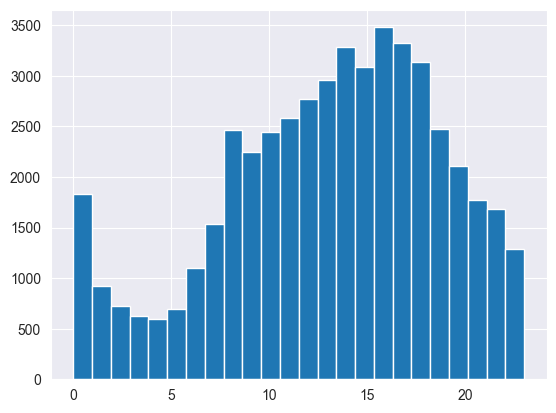

In [241]:
df.timestamp.dt.hour.hist(bins=24)

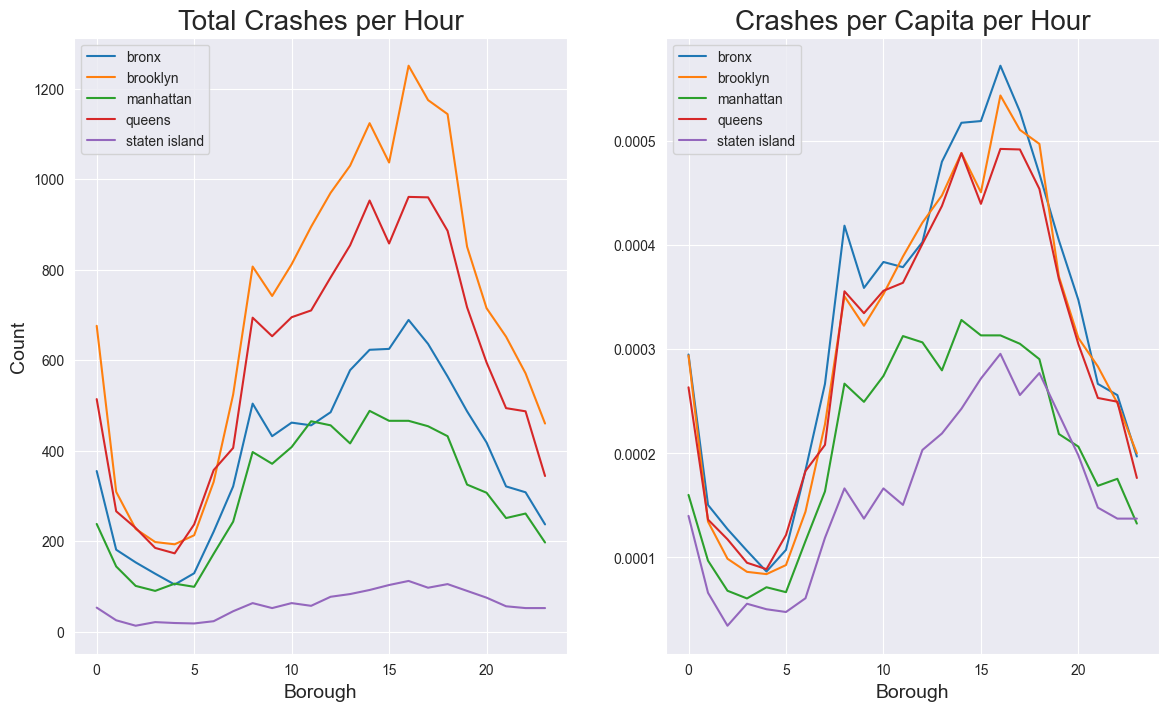

In [352]:
hour = df.timestamp.dt.hour
hour_by_borough = df.groupby(['borough', hour]).apply(len).unstack(0)
hour_by_borough_per_capita = pd.DataFrame(per_capita(hour_by_borough)).transpose()
# weekday_by_borough_norm = weekday_by_borough/weekday_by_borough.sum()
# weekday_by_borough_norm.plot()

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,8))

ax1.plot(hour_by_borough)
ax1.set_title("Total Crashes per Hour",fontsize=20)
ax1.set_ylabel("Count",fontsize=14)
ax1.set_xlabel("Borough",fontsize=14)
ax1.legend(['bronx', 'brooklyn', 'manhattan', 'queens', 'staten island'], loc='best')

ax2.plot(hour_by_borough_per_capita)
ax2.set_title("Crashes per Capita per Hour",fontsize=20)
ax2.set_xlabel("Borough",fontsize=14)
ax2.legend(['bronx', 'brooklyn', 'manhattan', 'queens', 'staten island'], loc='best')

plt.show()

### day of the week

<AxesSubplot: >

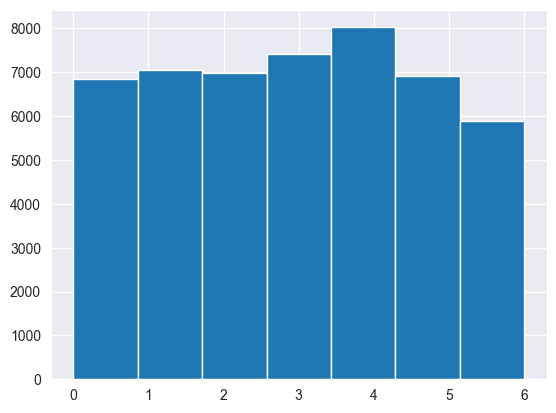

In [242]:
df.timestamp.dt.dayofweek.hist(bins=7)

### week of the year

<AxesSubplot: >

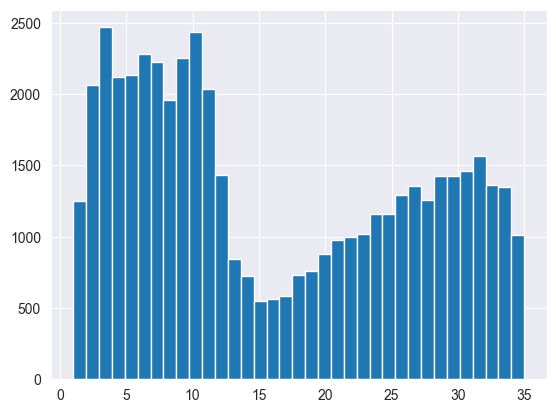

In [243]:
df.timestamp.dt.isocalendar().week.hist(bins=35)

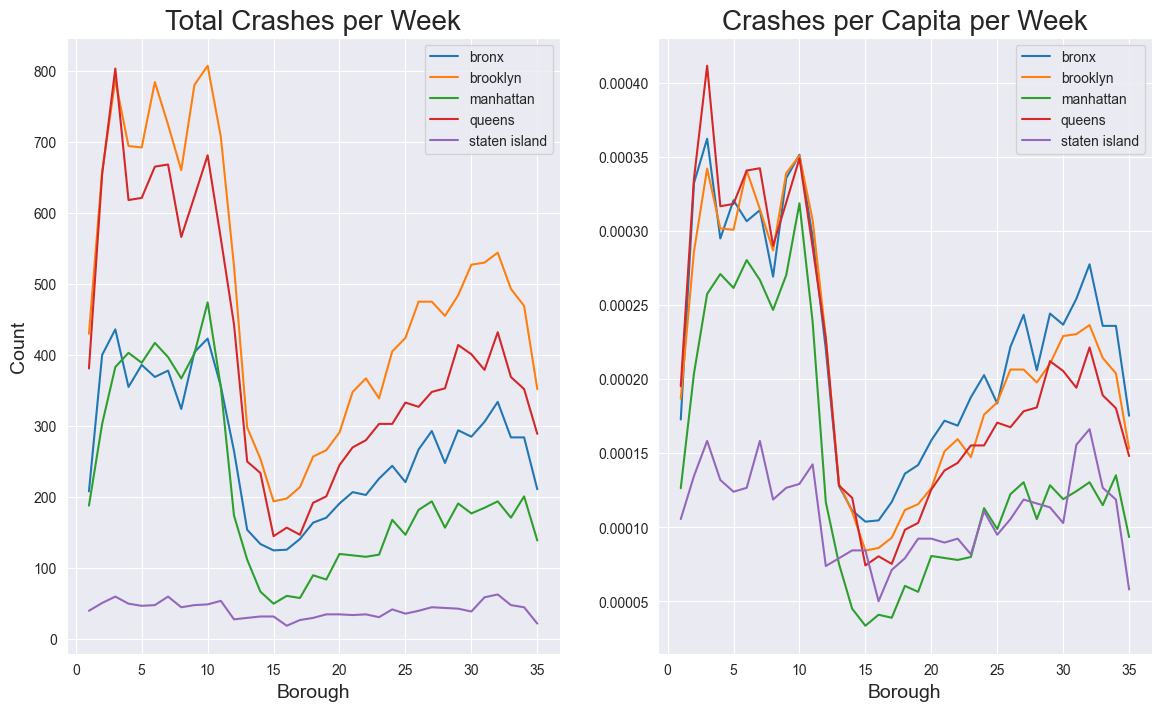

In [351]:
week = df.timestamp.dt.isocalendar().week
week_by_borough = df.groupby(['borough', week]).apply(len).unstack(0)
week_by_borough_per_capita = pd.DataFrame(per_capita(week_by_borough)).transpose()
# weekday_by_borough_norm = weekday_by_borough/weekday_by_borough.sum()
# weekday_by_borough_norm.plot()

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,8))

ax1.plot(week_by_borough)
ax1.set_title("Total Crashes per Week",fontsize=20)
ax1.set_ylabel("Count",fontsize=14)
ax1.set_xlabel("Borough",fontsize=14)
ax1.legend(['bronx', 'brooklyn', 'manhattan', 'queens', 'staten island'], loc='best')

ax2.plot(week_by_borough_per_capita)
ax2.set_title("Crashes per Capita per Week",fontsize=20)
ax2.set_xlabel("Borough",fontsize=14)
ax2.legend(['bronx', 'brooklyn', 'manhattan', 'queens', 'staten island'], loc='best')

plt.show()

## Subsection 2.1

There is a very interesting result in this last graph. The Covid pandemic reached New York City in early March (roughly, week 10). We see a significant drop in accidents just after this time.

# Investigation of accidents over different areas

## Accidents by borough

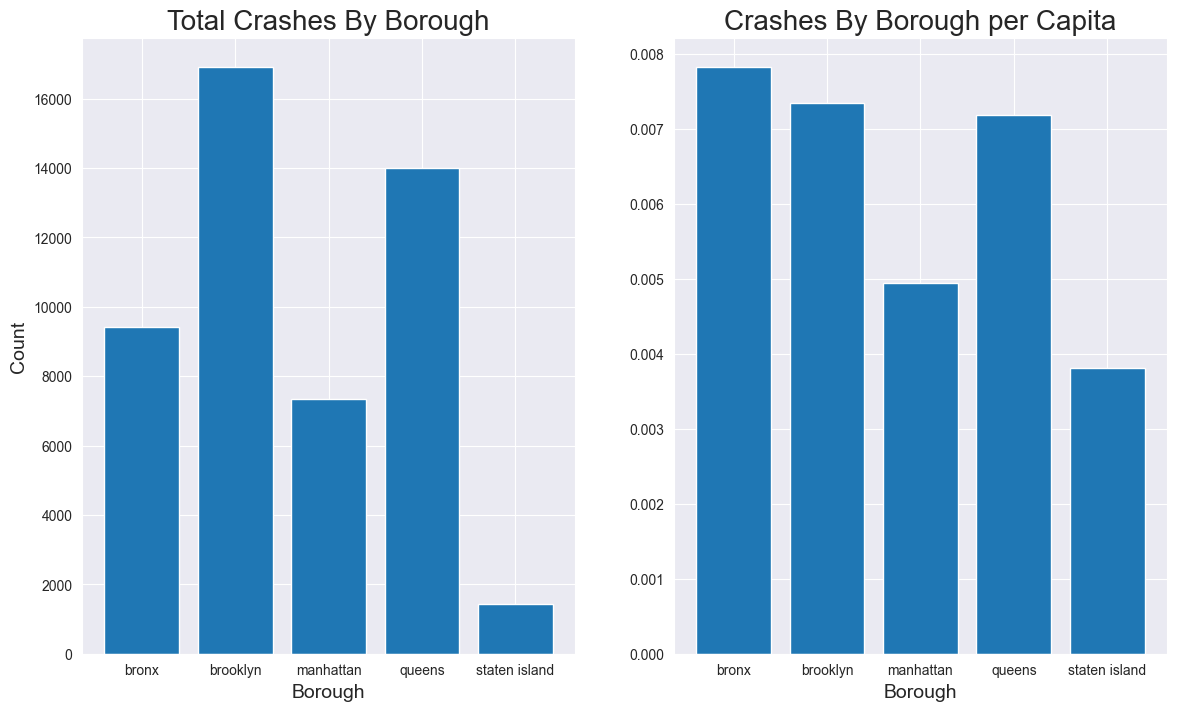

In [340]:
borough_population = {'bronx': 1203789, 'brooklyn': 2300664, 'manhattan': 1487536, 'queens': 1951598, 'staten island': 378977}
accidents_by_borough = df.groupby(['borough']).apply(len)
accidents_by_borough_per_capita = per_capita(df.groupby(['borough']).apply(len))

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,8))

ax1.bar(x=list(borough_population.keys()),height=accidents_by_borough)
ax1.set_title("Total Crashes By Borough",fontsize=20)
ax1.set_ylabel("Count",fontsize=14)
ax1.set_xlabel("Borough",fontsize=14)

ax2.bar(x=list(borough_population.keys()),height=accidents_by_borough_per_capita)
ax2.set_title("Crashes By Borough per Capita",fontsize=20)
ax2.set_xlabel("Borough",fontsize=14)

# plt.legend()
plt.show()

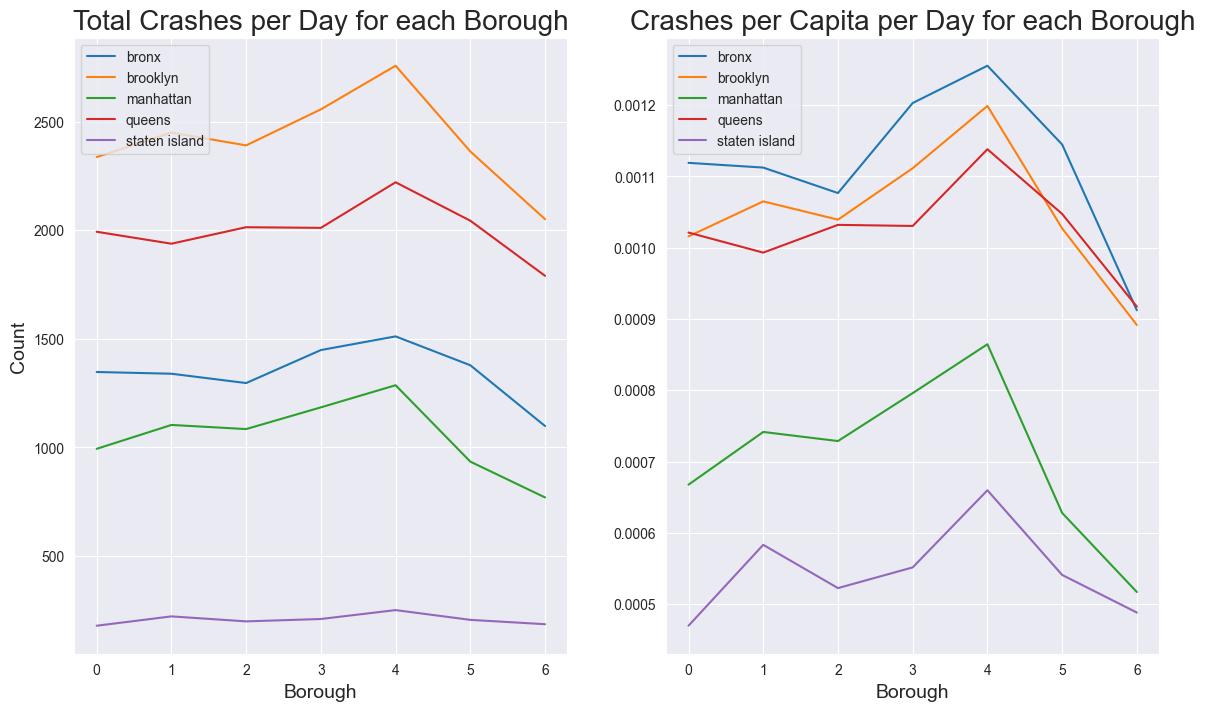

In [341]:
day = df.timestamp.dt.dayofweek
weekday_by_borough = df.groupby(['borough', day]).apply(len).unstack(0)
weekday_by_borough_per_capita = pd.DataFrame(per_capita(weekday_by_borough)).transpose()
# weekday_by_borough_norm = weekday_by_borough/weekday_by_borough.sum()
# weekday_by_borough_norm.plot()

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,8))

ax1.plot(weekday_by_borough)
ax1.set_title("Total Crashes per Day for each Borough",fontsize=20)
ax1.set_ylabel("Count",fontsize=14)
ax1.set_xlabel("Borough",fontsize=14)
ax1.legend(['bronx', 'brooklyn', 'manhattan', 'queens', 'staten island'], loc='upper left')

ax2.plot(weekday_by_borough_per_capita)
ax2.set_title("Crashes per Capita per Day for each Borough",fontsize=20)
ax2.set_xlabel("Borough",fontsize=14)
ax2.legend(['bronx', 'brooklyn', 'manhattan', 'queens', 'staten island'])

plt.show()

## Accidents by zip

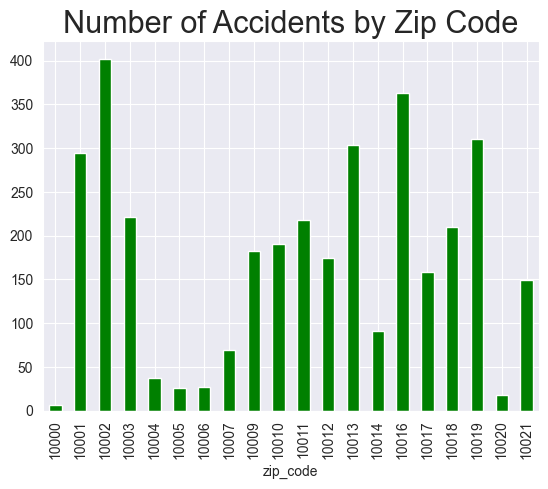

In [319]:
ax = df.groupby(['zip_code']).apply(len).head(20).plot.bar(color='green')
ax.set_title('Number of Accidents by Zip Code', fontsize=22)
ax.tick_params(axis='x', rotation=90)

## Total Injuries by Borough

In [249]:
df.groupby('borough')['number_of_persons_injured'].sum()

borough
bronx            3232
brooklyn         6024
manhattan        2151
queens           4595
staten island     610
Name: number_of_persons_injured, dtype: int64

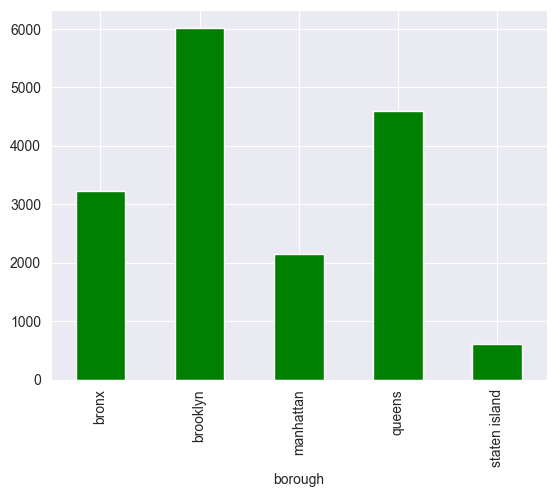

In [250]:
ax = df.groupby('borough')['number_of_persons_injured'].sum().plot.bar(color='green')


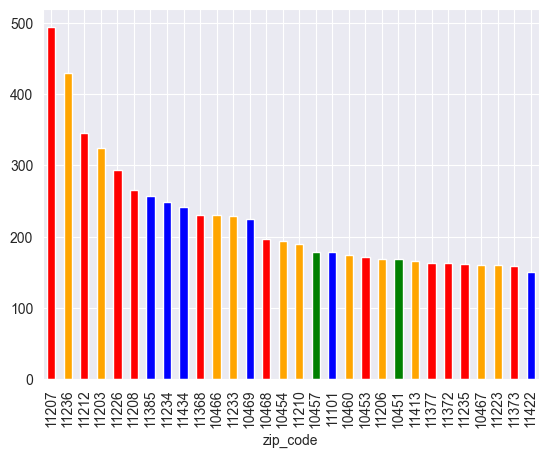

In [251]:
colors = {'bronx': 'red', 'brooklyn': 'orange', 'manhattan': 'green', 'queens': 'blue', 'staten island': 'purple'}
accidents_by_zip = df.groupby('zip_code')['number_of_persons_injured'].sum().sort_values(ascending=False).head(30).plot.bar(color=[colors[i] for i in df['borough']])


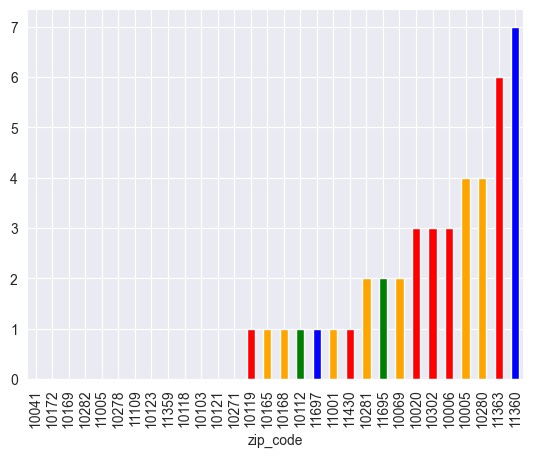

In [252]:
accidents_by_zip = df.groupby('zip_code')['number_of_persons_injured'].sum().sort_values(ascending=True).head(30).plot.bar(color=[colors[i] for i in df['borough']])

Here is an interesting chart. It shows the 40 streets with the most accidents. The color scheme is by borough.

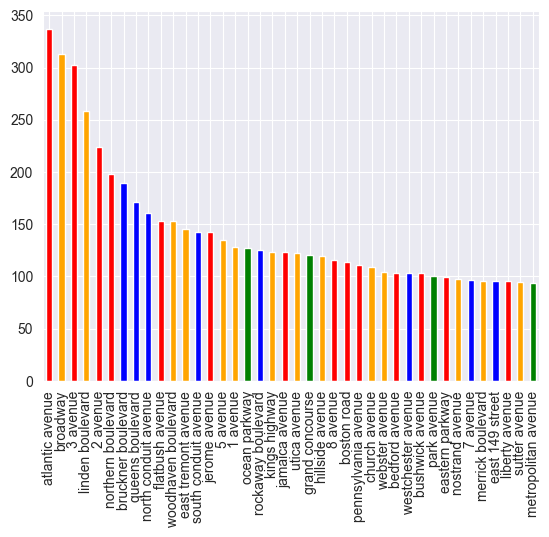

In [253]:
ax = df['on_street_name'].value_counts().head(40).plot(kind='bar', color=[colors[i] for i in df['borough']])

I looked briefly at the chart and realized there was a problem. I'm aware of 5th Ave in Manhattan, but in the chart it's color coded for Brooklyn. I checked out what was going on and found the following.

In [254]:
ave_5 = df[df['on_street_name'] == '5 avenue']
print(ave_5['borough'].value_counts())

manhattan    76
brooklyn     58
queens        1
Name: borough, dtype: int64


There is a 5th Ave in both Manhattan and Brooklyn (and the one in Brooklyn stretches up into Queens), and my chart is adding them together even through they are completely distinct streets. This would require a bit more work to sort them out, should I come revisit this later. 

Another issue is that some of these streets are VERY long. It would be interesting to normalize them by length, or by their number of intersections/cross streets to see if any of the shorter streets stand out here, or if the longer streets are the busiest, and therefore have the most accidents.

# Investigate data pre- and post-Covid

## Split data into pre- and post-Covid dataframes

At which date should I split the data?

A [quick search](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_New_York_City#Stay-at-home_order) shows that a stay-at-home order went into effect on March 22 (iso week 10). The accidents-by-week chart in section 2.1 above shows a sharp downward trend in traffic accidents beginning one or two weeks later and continuing until week 15, when they started to slowly climb. New York City reopened in four phases over 4 months beginning May 7. None of this is apparent in the nearly linear positive change in accidents after bottoming out.

I will split the data on March 22, even though there was a week or two delay in the number of accidents dropping off.

In [255]:
df_preC = df[df.timestamp < '2020-03-22 00:00:00'].reset_index(drop=True)
df_postC = df[df.timestamp >= '2020-03-22 00:00:00'].reset_index(drop=True)

<AxesSubplot: xlabel='borough'>

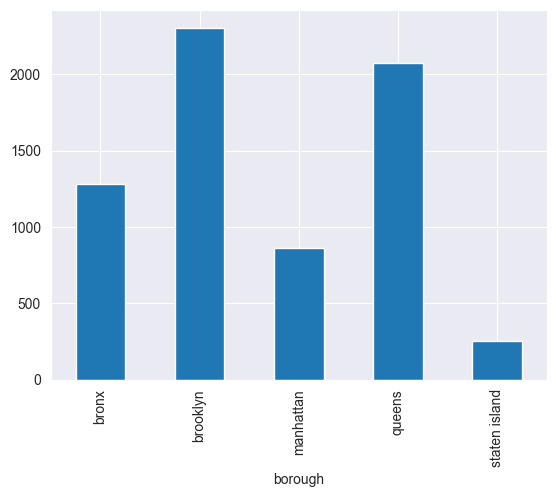

In [256]:
df_preC.groupby('borough')['number_of_persons_injured'].sum().plot(kind='bar')